In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [243]:
ALGO = ['correction', 'detection_correction']
COMMODITY = ['cobalt_shift_new_20', 'copper_shift_new_20', 'magnesium_shift_new_20', 'nickel_shift_new_20']

In [244]:
plt.rcParams.update({
    'axes.titlesize': 18,   # Title size
    'axes.labelsize': 16,   # Axis label size
    'xtick.labelsize': 14,  # X-axis tick label size
    'ytick.labelsize': 14,  # Y-axis tick label size
    'legend.fontsize': 14   # Legend font size
})

fontsize = 15

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_ablation_barcharts(xlsx_path, algorithm, comm):
    # Read the xlsx file into a pandas DataFrame
    comm = comm.split('_')[0]
    comm = comm.capitalize()    
    df = pd.read_excel(xlsx_path)
    
    # Fill empty 'Exclude' fields with 'None'
    df['Exclude'].fillna('None', inplace=True)
    
    # Filter based on the algorithm
    df = df[df['Algorithm'] == algorithm]

    # Identify unique models
    models = df['Model'].unique()
    
    for model in models:
        model_df = df[df['Model'] == model]

        # Prepare the data for plotting
        excluded_models = sorted([x for x in model_df['Exclude'].unique() if x != 'None'], key=lambda x: (x != 'None'))
        prec_edcr = model_df.groupby('Exclude')['Precision (EDCR)'].mean().reindex(excluded_models + ['None'])
        rec_edcr = model_df.groupby('Exclude')['Recall (EDCR)'].mean().reindex(excluded_models + ['None'])

        barWidth = 0.35
        r1 = np.arange(len(prec_edcr) - 1)  # Adjust for 'None'
        r2 = [x + barWidth for x in r1]

        plt.figure(figsize=(10,5))
        bars1 = plt.bar(r1, prec_edcr[excluded_models], color='k', width=barWidth, edgecolor='grey', label='Precision (EDCR)', zorder=1)
        bars2 = plt.bar(r2, rec_edcr[excluded_models], color='white', width=barWidth, edgecolor='black', label='Recall (EDCR)', zorder=2)

        # Calculate the maximum value from both precision and recall excluding 'None'
        max_value = max(prec_edcr[excluded_models].max(), rec_edcr[excluded_models].max())
        y_max = max_value + 0.05  # Adding a small margin above the highest bar for better visualization

        # Horizontal lines for 'None'
        none_precision = prec_edcr['None']
        none_recall = rec_edcr['None']
        plt.axhline(y=none_precision, color='k', linestyle='--', linewidth=1)
        plt.axhline(y=none_recall, color='black', linestyle=':', linewidth=1)

        # Create custom legend handles
        precision_handle = mlines.Line2D([], [], color='k', linestyle='--', label='Precision (EDCR) - No Ablation')
        recall_handle = mlines.Line2D([], [], color='black', linestyle=':', label='Recall (EDCR) - No Ablation')

        # Annotations for the difference
        for bar, value in zip(bars1, prec_edcr[excluded_models]):
            diff = value - none_precision
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, value/2, f'{sign}{abs(diff):.2f}', ha='center', va='center', color='white', fontsize=fontsize)

        for bar, value in zip(bars2, rec_edcr[excluded_models]):
            diff = value - none_recall
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, value/2, f'{sign}{abs(diff):.2f}', ha='center', va='center', color='black', fontsize=fontsize)

        plt.xlabel('Excluded Model', fontweight='bold')
        labels = [label.replace('CNNA', 'CNN Attention') for label in excluded_models]
        plt.xticks([r + barWidth/2 for r in range(len(prec_edcr) - 1)], labels)
        plt.ylabel('Performance', fontweight='bold')
        plt.ylim([0, y_max])  # Dynamic y-axis limit based on the data
        plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.3, axis='y', zorder=-1)

        # First legend for bars
        first_legend = plt.legend(handles=[bars1, bars2], labels=['Precision (EDCR)', 'Recall (EDCR)'], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=2)
        plt.gca().add_artist(first_legend)

        # Add the second legend with our custom handles
        plt.legend(handles=[precision_handle, recall_handle], loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, ncol=2)
        plt.title(f'{comm}: EDCR Performance for {model} using {algorithm}')

        plt.xticks(rotation=0)
        plt.tight_layout()  # Ensure proper layout
        plt.show()
        plt.close()


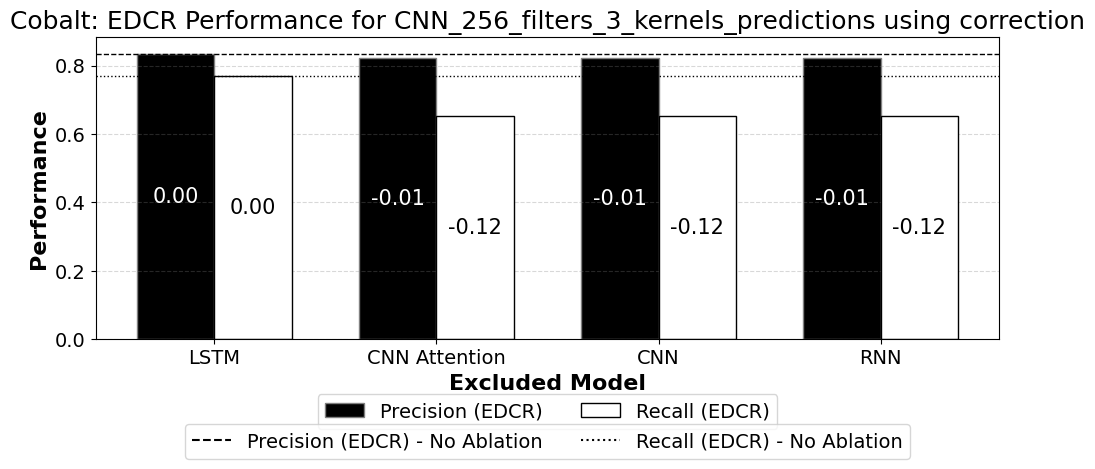

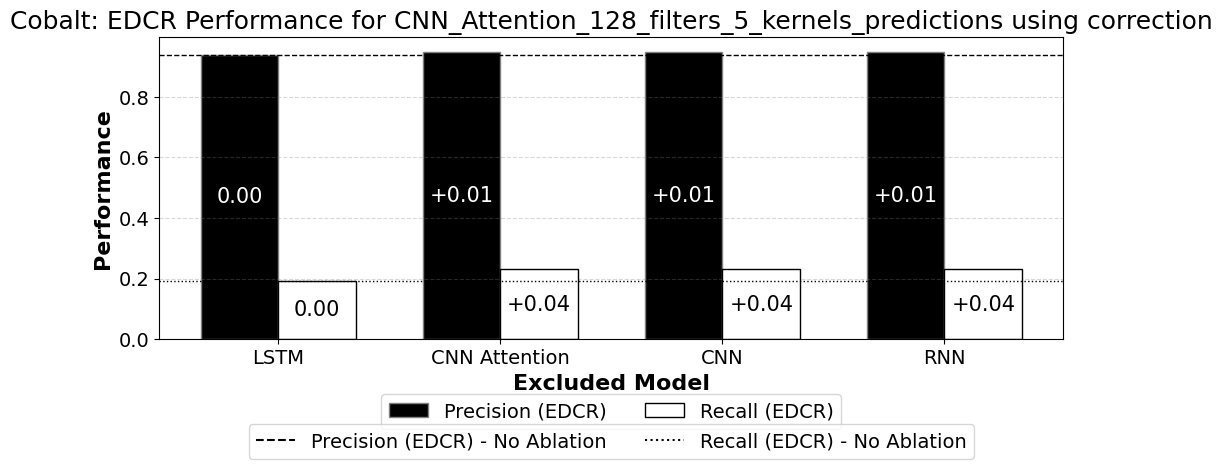

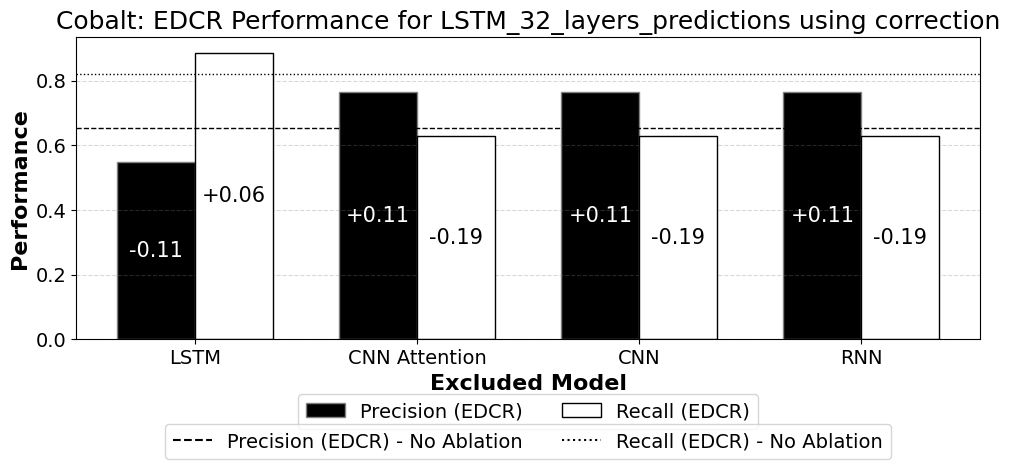

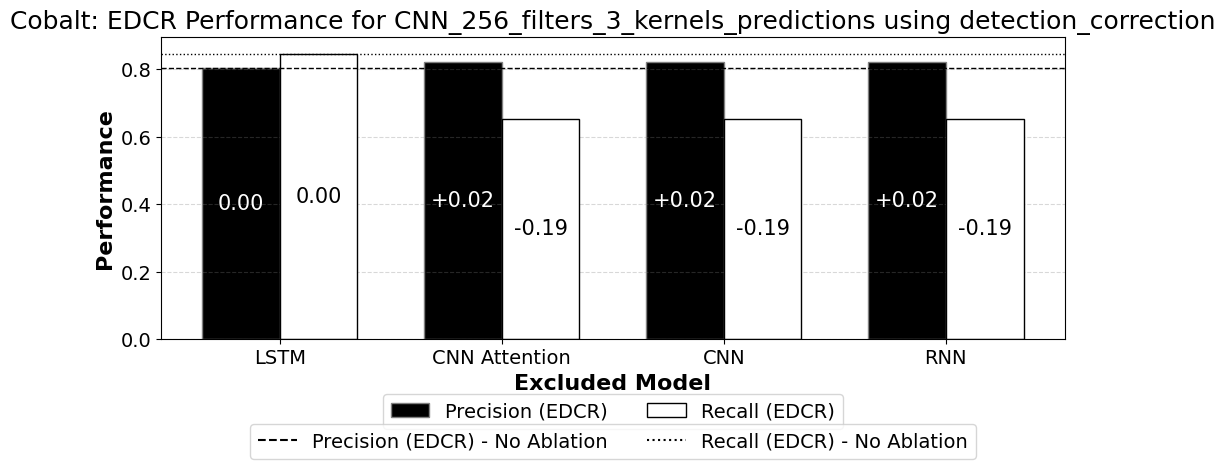

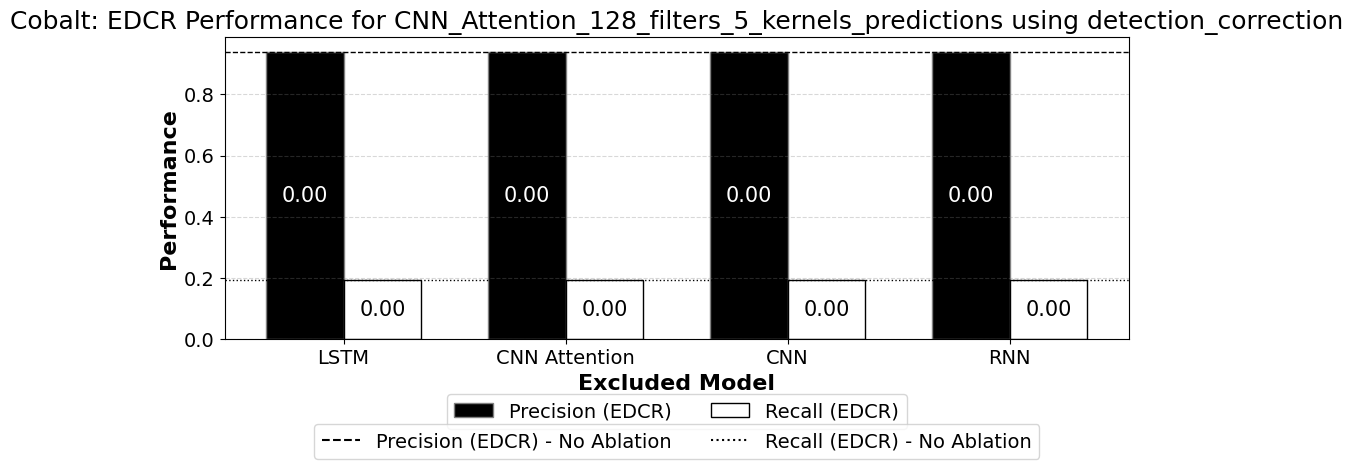

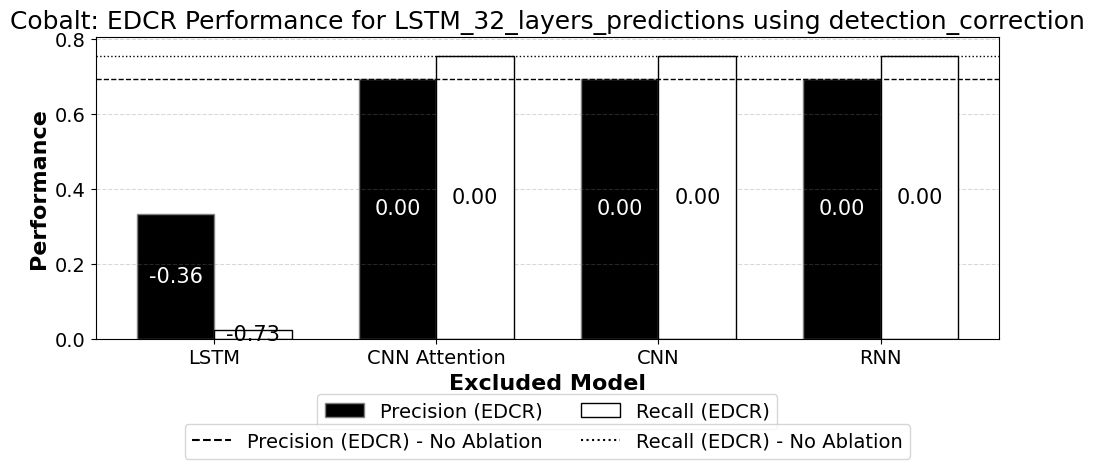

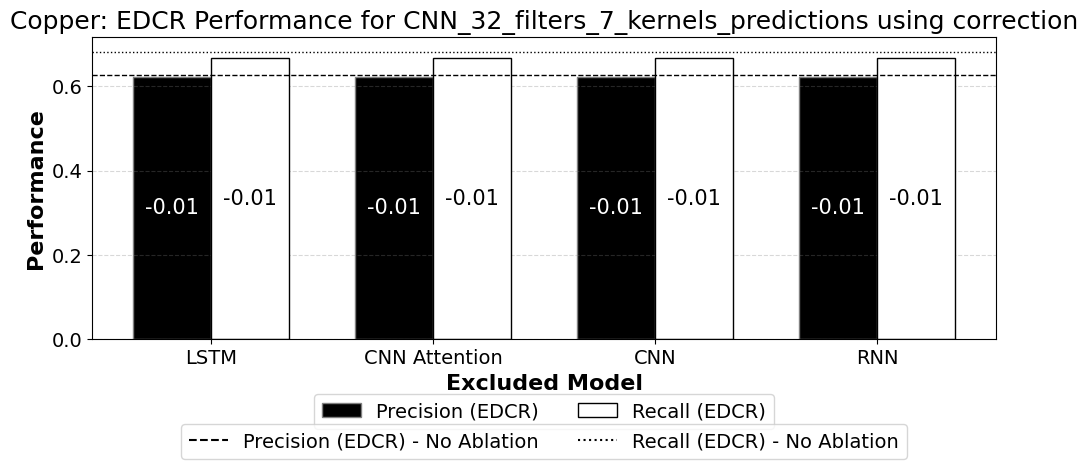

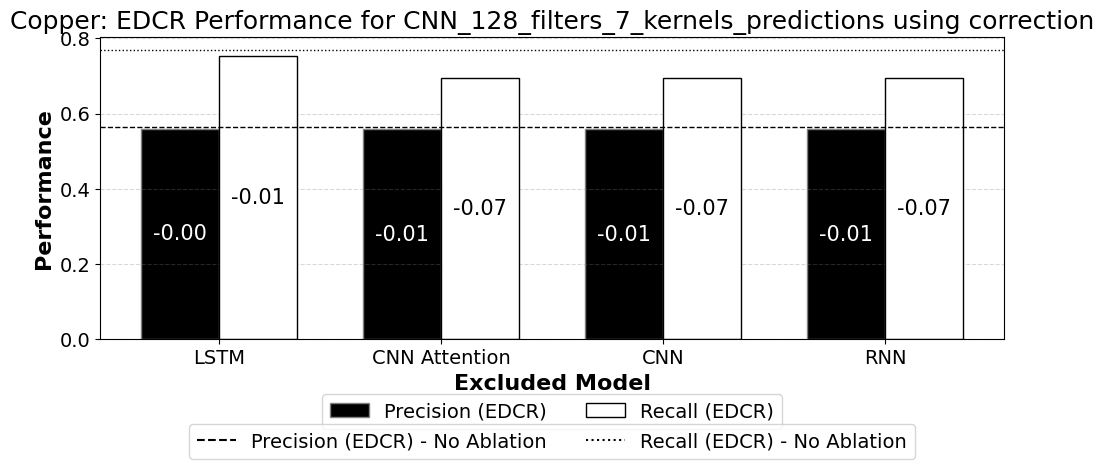

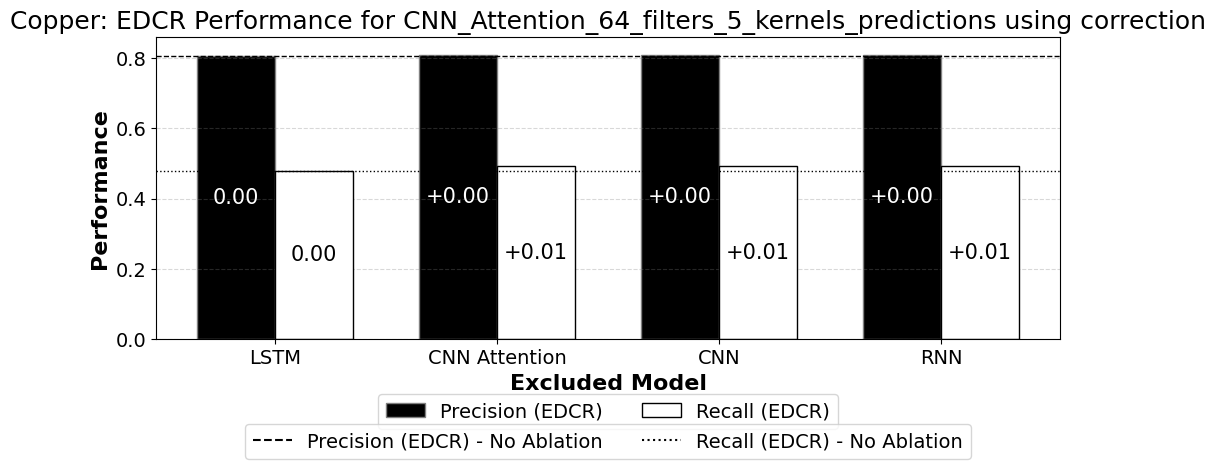

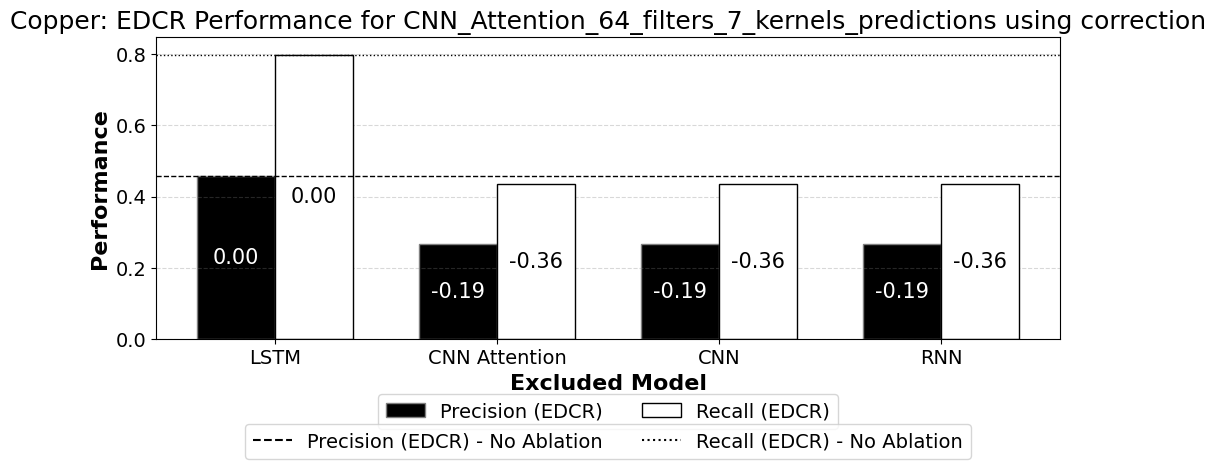

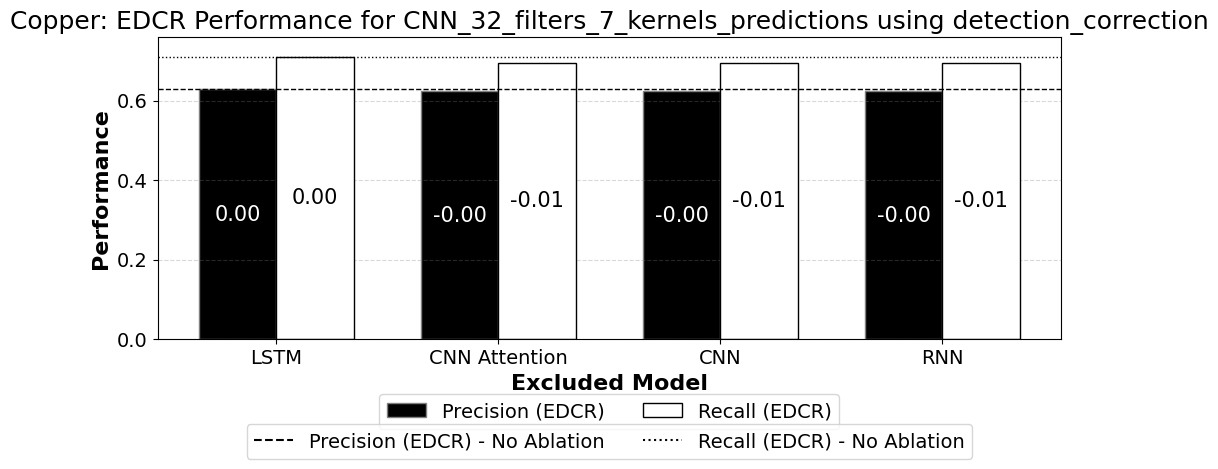

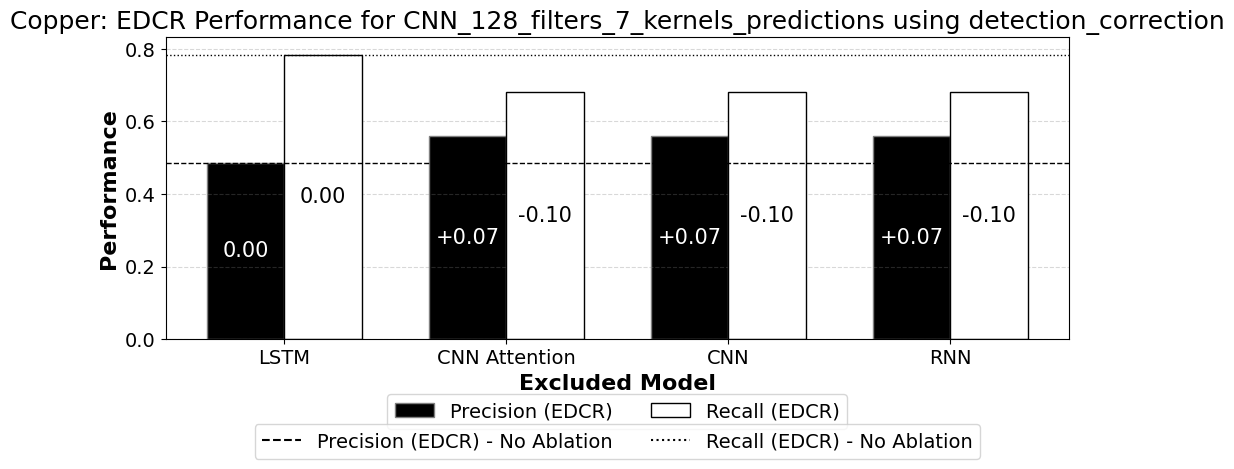

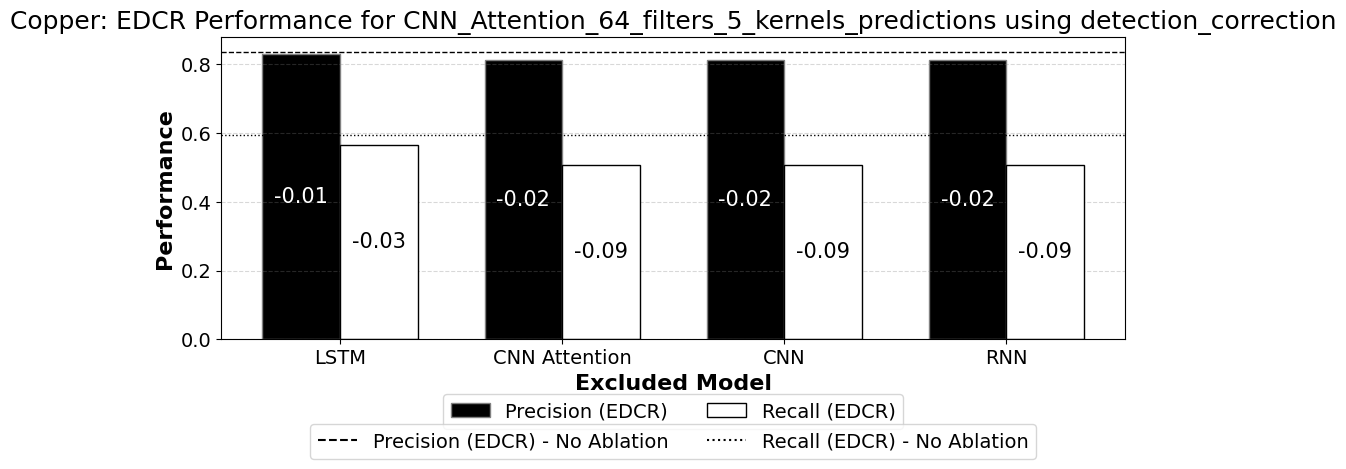

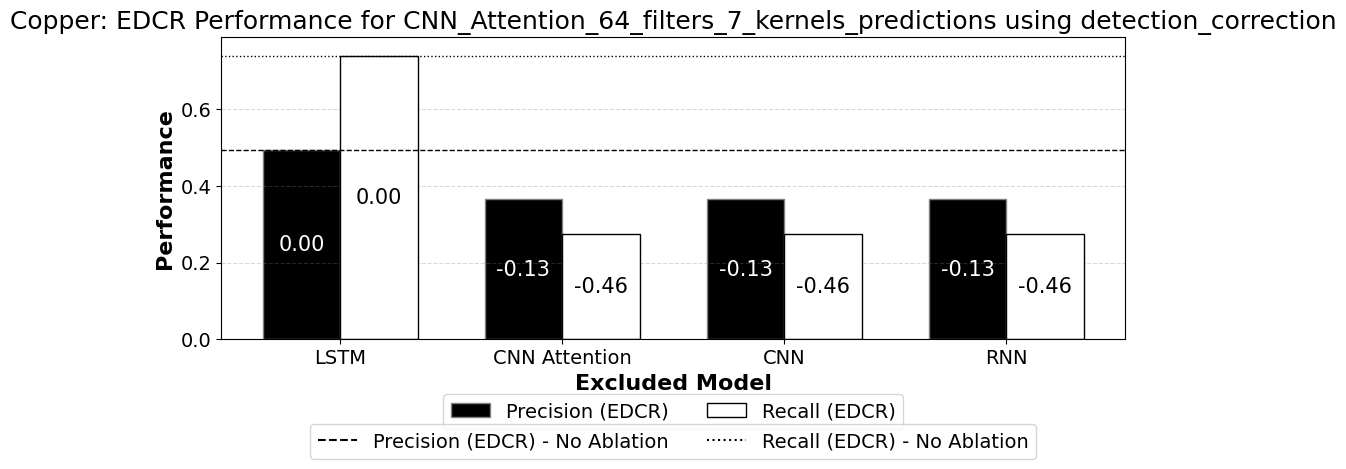

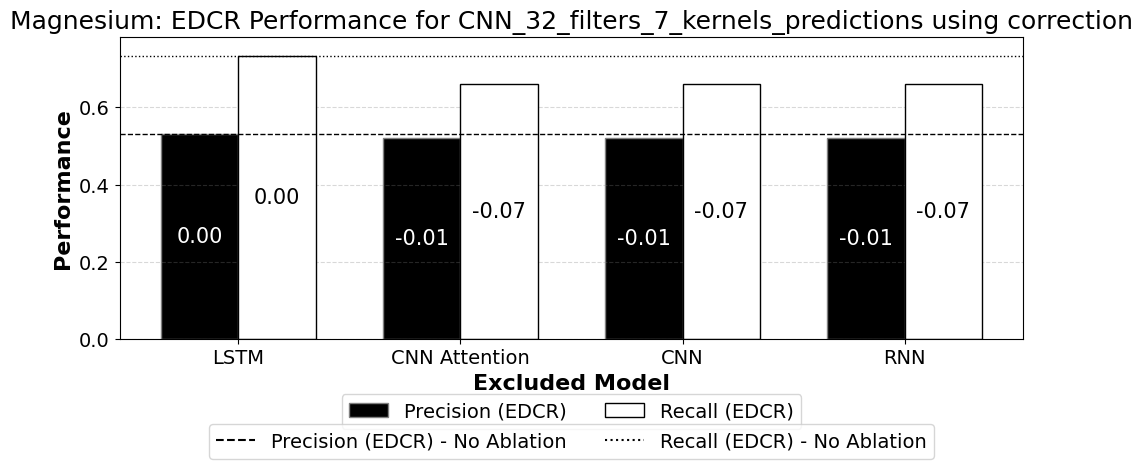

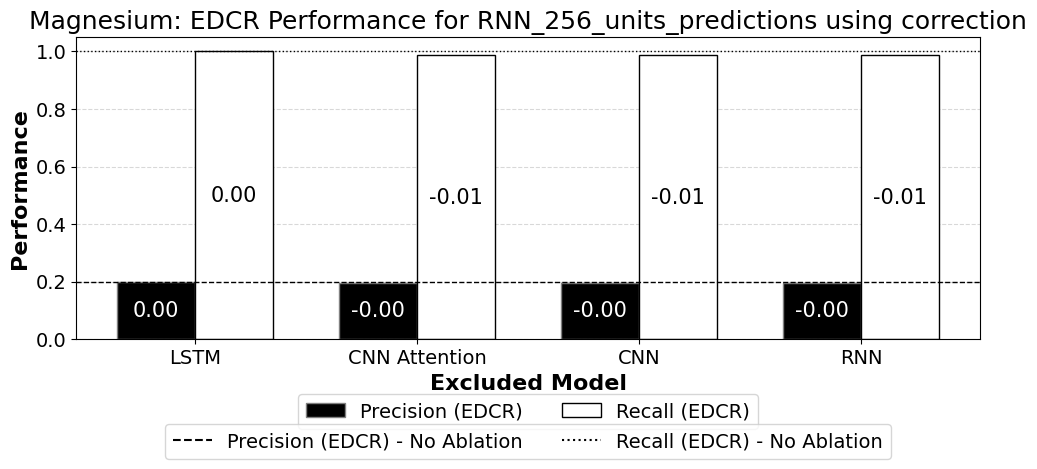

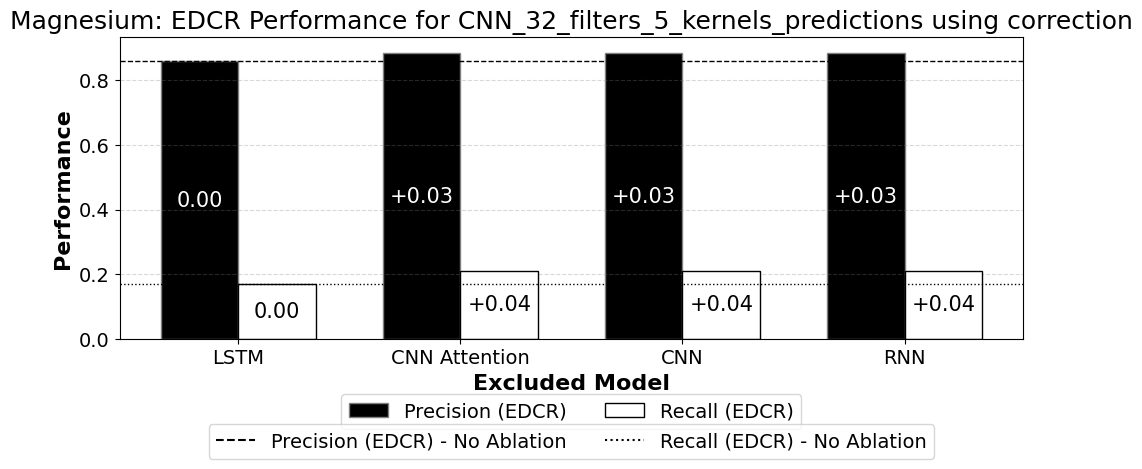

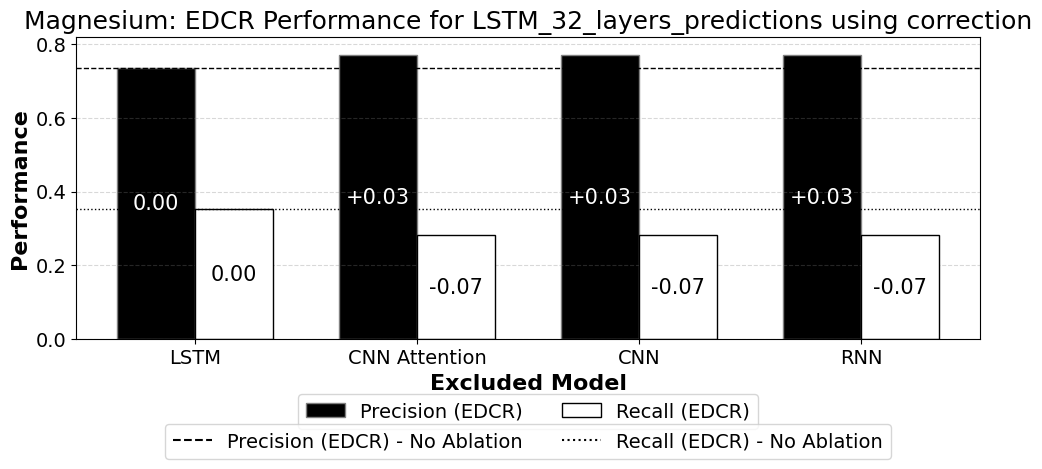

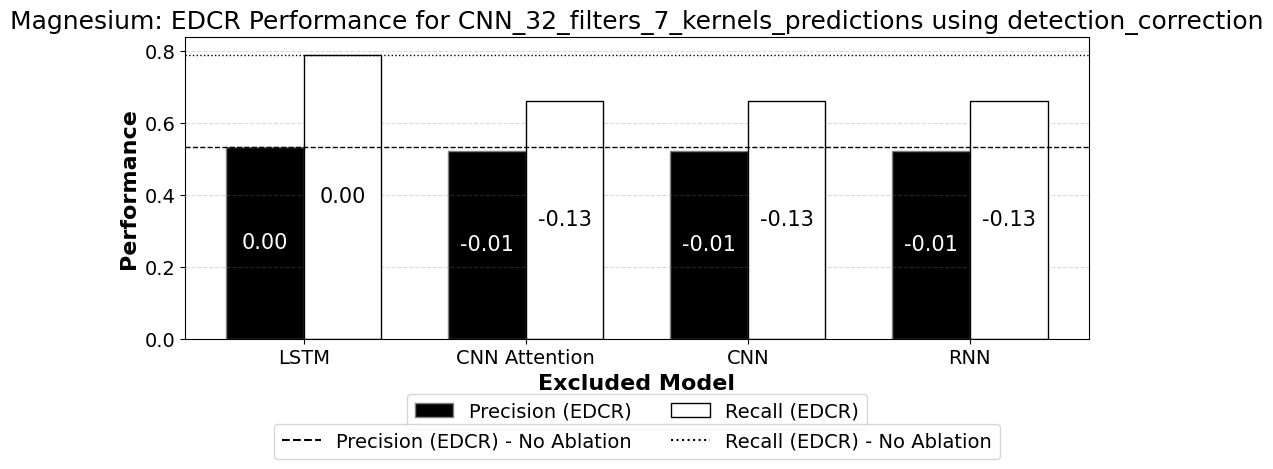

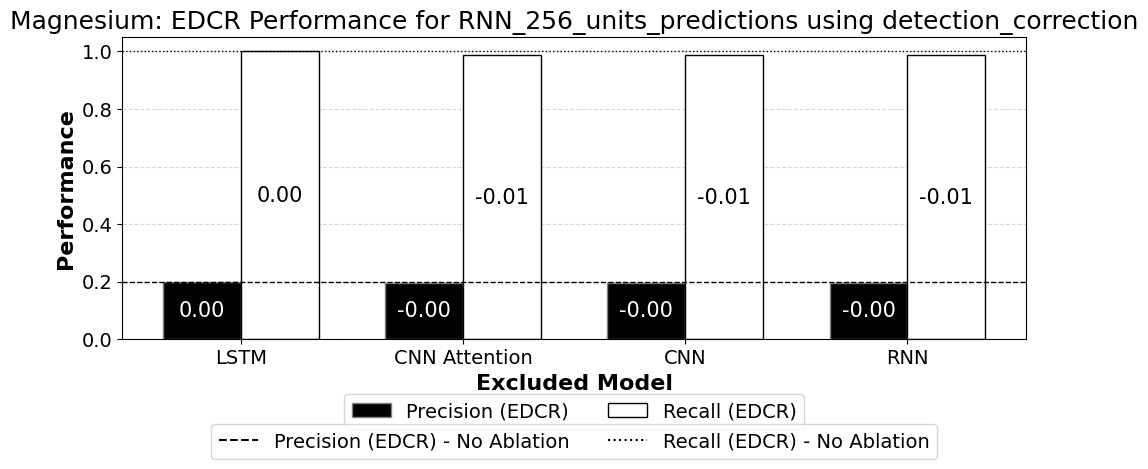

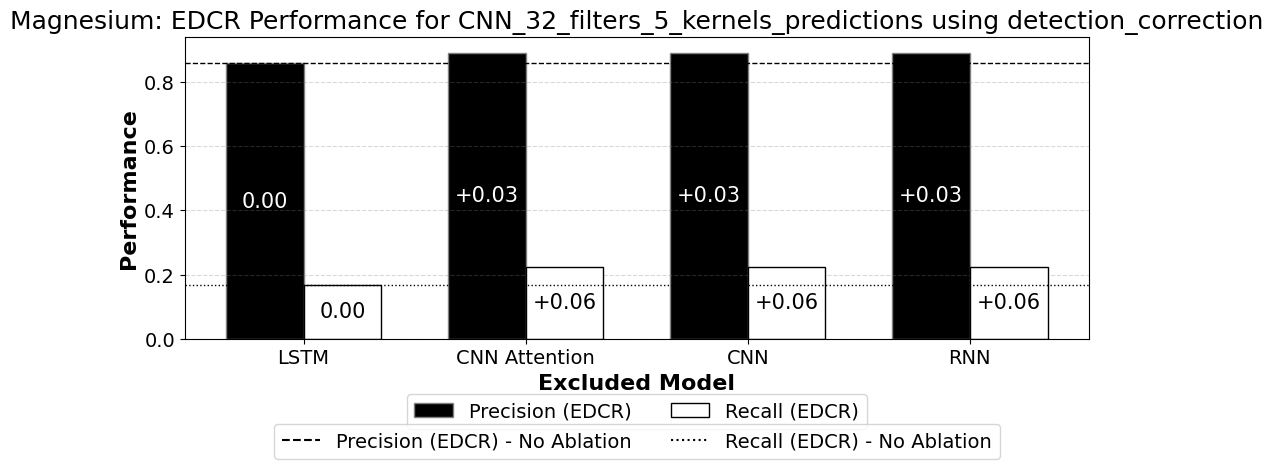

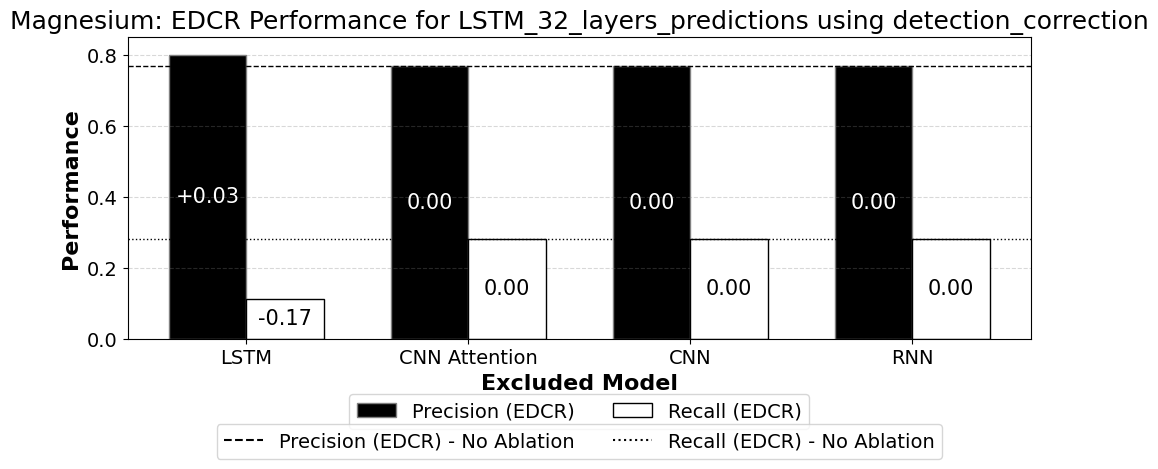

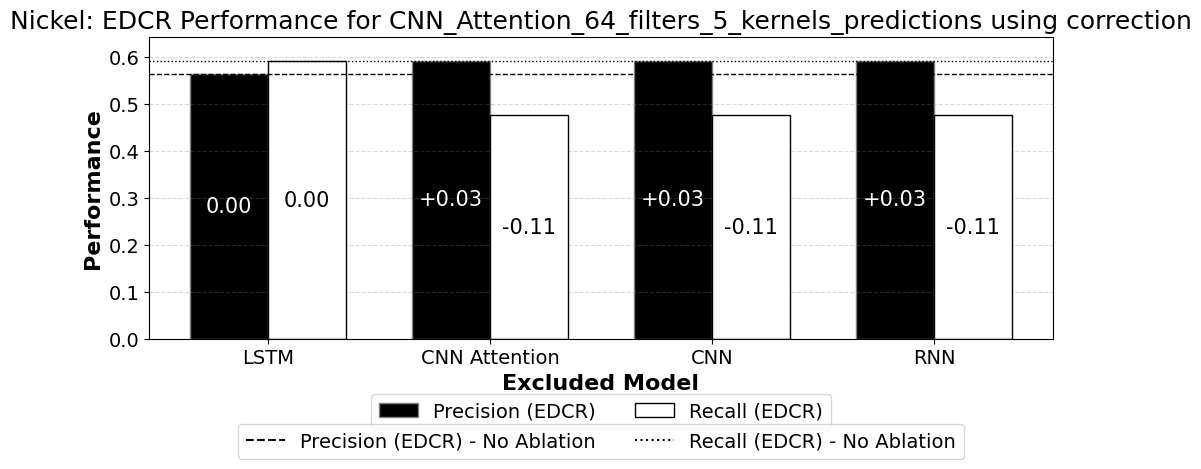

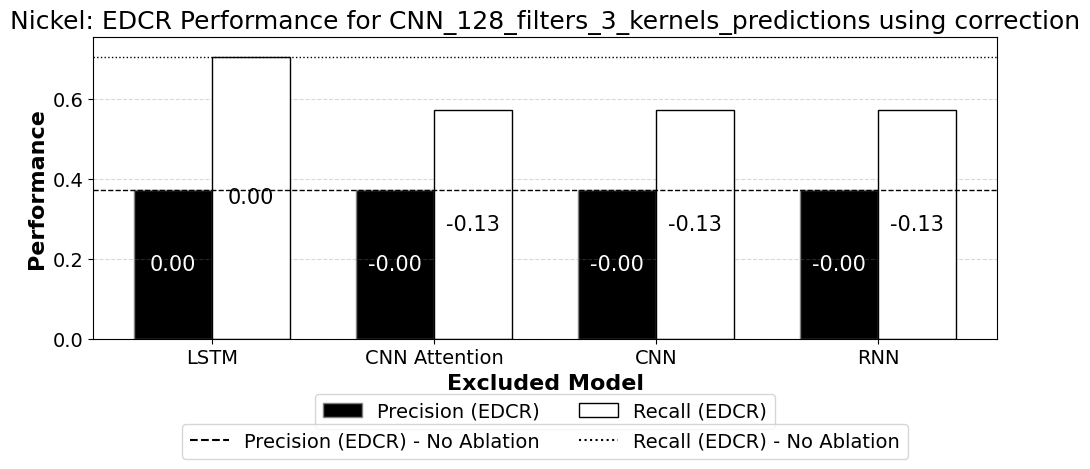

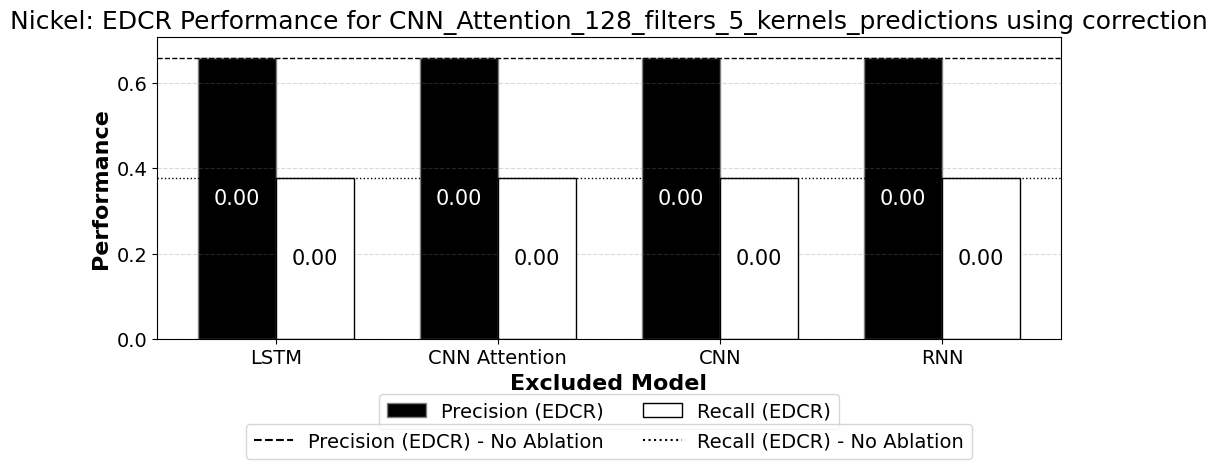

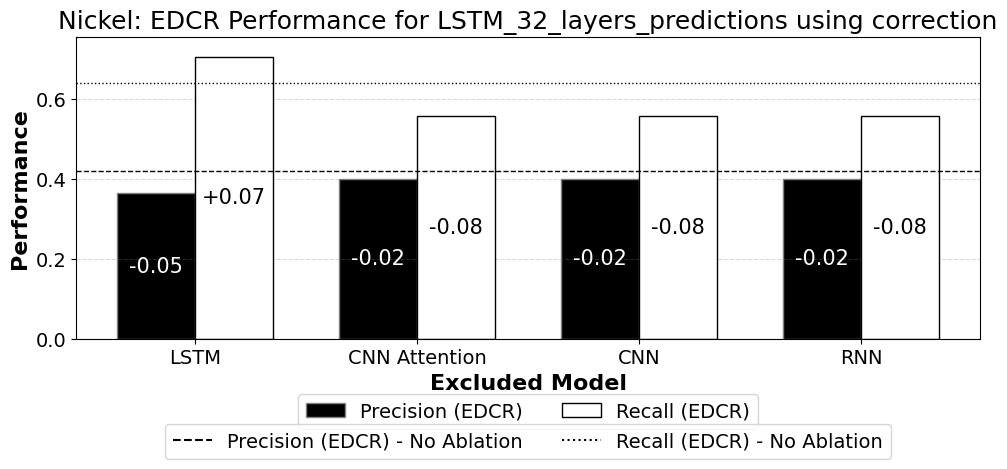

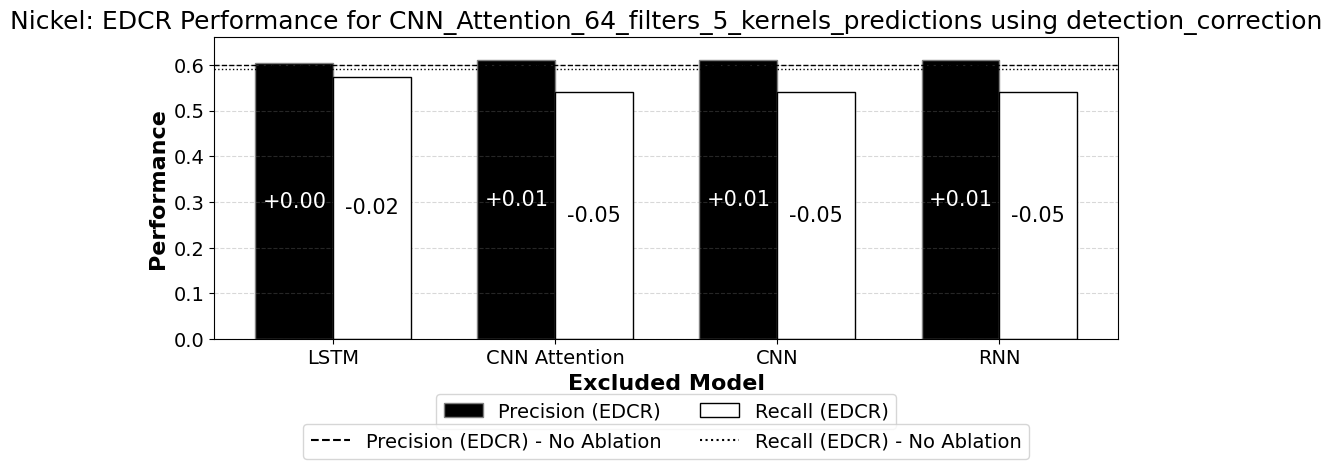

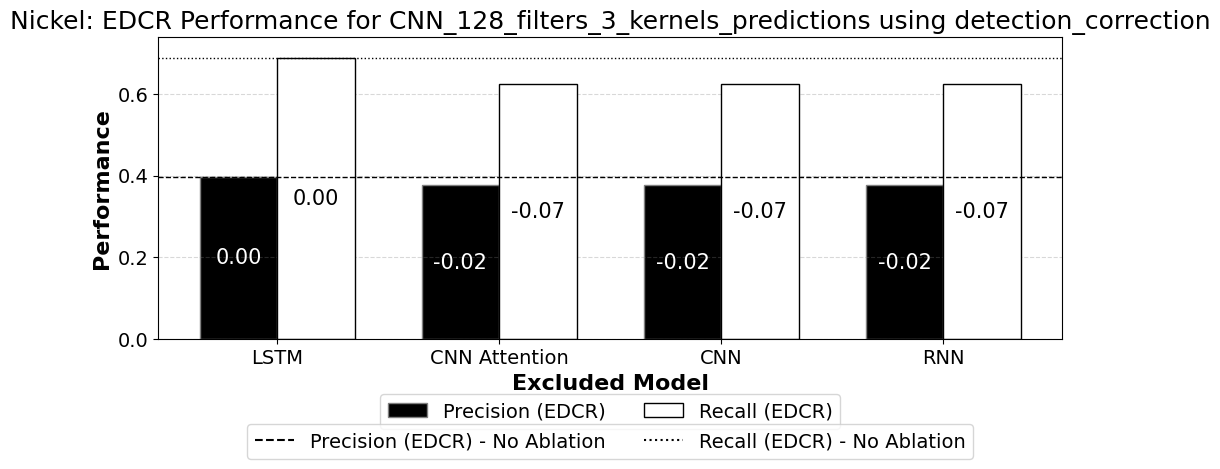

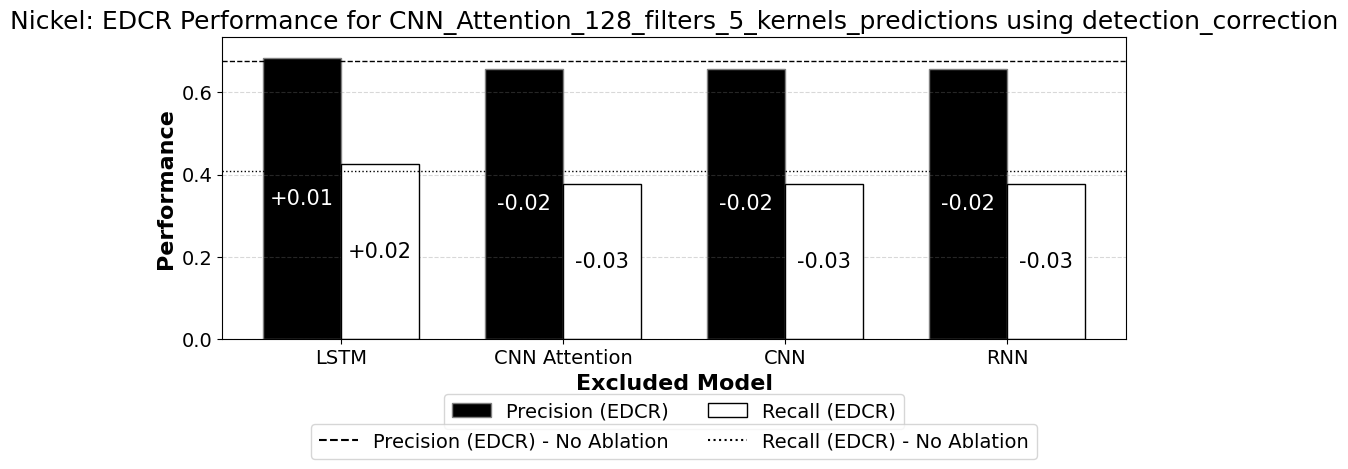

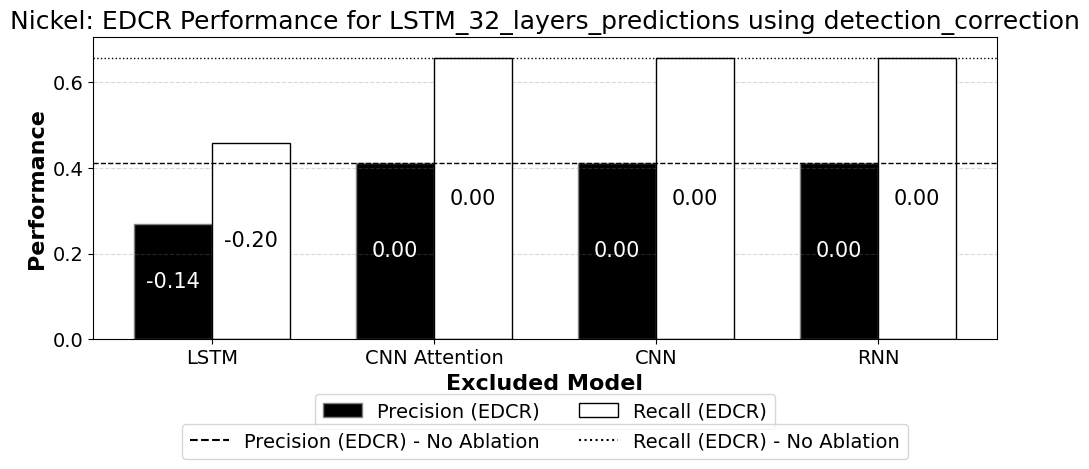

In [246]:
for comm in COMMODITY:
    for algo in ALGO:
        plot_ablation_barcharts(f'out/top_f1/{comm}_results.xlsx', algo, comm)


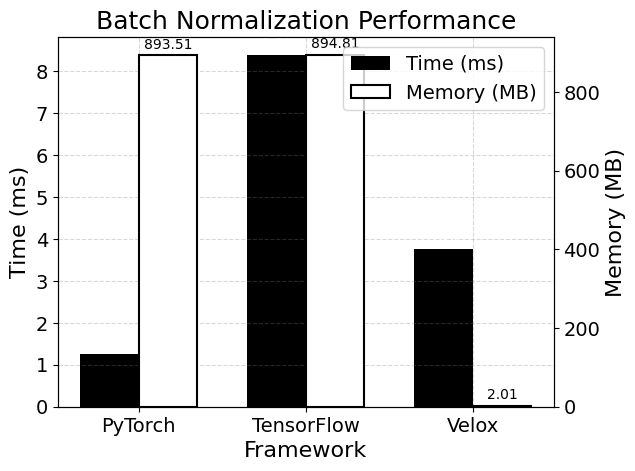

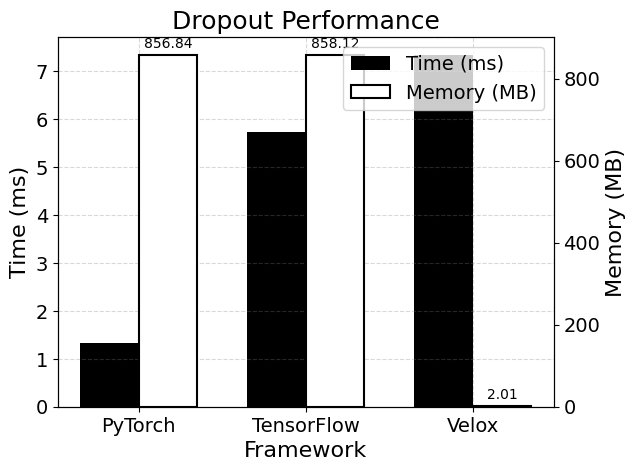

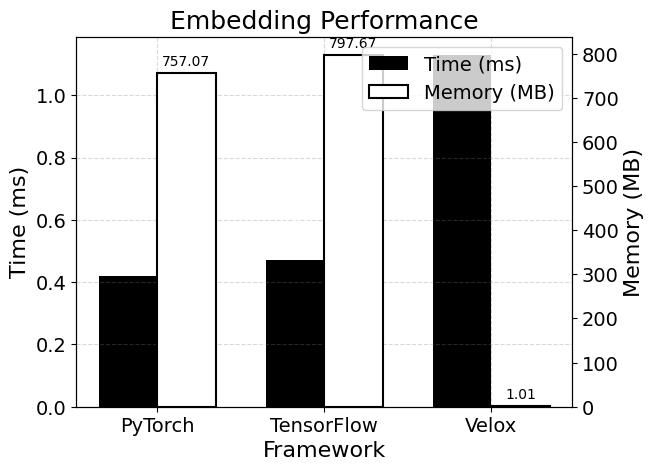

In [247]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data from the table
# technologies = ['PyTorch', 'TensorFlow', 'Velox']
# time_data = {
#     'Batch Normalization': [1.26, 8.39, 3.75],
#     'Dropout': [1.33, 5.73, 7.35],
#     'Embedding': [0.42, 0.47, 1.13]
# }
# memory_data = {
#     'Batch Normalization': [893.51, 894.81, 2.00781],
#     'Dropout': [856.84, 858.12, 2.00781],
#     'Embedding': [757.07, 797.67, 1.00586]
# }

# # Create a bar chart for each feature
# for feature in ['Batch Normalization', 'Dropout', 'Embedding']:
#     fig, ax1 = plt.subplots()

#     # Bar locations
#     ind = np.arange(len(technologies))
#     width = 0.35

#     # Time data bars
#     time_bars = ax1.bar(ind - width/2, time_data[feature], width, label='Time (ms)', color='black')
#     ax1.set_xlabel('Framework')
#     ax1.set_ylabel('Time (ms)', color='black')
#     ax1.set_title(f'{feature} Performance')
#     ax1.set_xticks(ind)
#     ax1.set_xticklabels(technologies)
#     ax1.tick_params(axis='y', labelcolor='black')

#     # Enable grid for better visibility of tick lines
#     ax1.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)

#     # Annotate each time bar with its respective value
#     for bar in time_bars:
#         yval = bar.get_height()
#         # Ensuring the text is visibly above the bar
#         ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', color='white')

#     # Create a second y-axis for memory data
#     ax2 = ax1.twinx()
#     memory_bars = ax2.bar(ind + width/2, memory_data[feature], width, label='Memory (MB)', 
#                           color='white', edgecolor='black', linewidth=1.5)
#     ax2.set_ylabel('Memory (MB)', color='black')
#     ax2.tick_params(axis='y', labelcolor='black')

#     # Annotate each memory bar with its respective value
#     for bar in memory_bars:
#         yval = bar.get_height()
#         # Adjust the position slightly higher for clarity
#         ax2.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.2f}', ha='center', va='bottom', color='black')

#     # Adding legend
#     fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

#     plt.show()



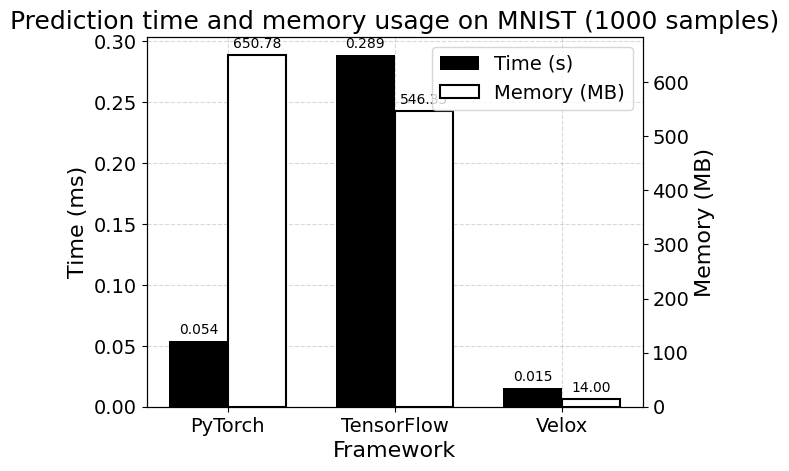

In [248]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data setup
# technologies = ['PyTorch', 'TensorFlow', 'Velox']
# times = [0.05433320999, 0.2891306877, 0.015375]  # Time in milliseconds
# memories = [650.7773438, 546.3515625, 14]  # Memory usage in MB

# fig, ax1 = plt.subplots()

# # Bar locations
# ind = np.arange(len(technologies))  # the x locations for the groups
# width = 0.35  # the width of the bars

# # Plotting time bars
# time_bars = ax1.bar(ind - width/2, times, width, label='Time (s)', color='black', zorder=3)

# # Memory bars
# ax2 = ax1.twinx()
# memory_bars = ax2.bar(ind + width/2, memories, width, label='Memory (MB)', color='white', edgecolor='black', linewidth=1.5, zorder=3)

# # Adding labels, titles and grid
# ax1.set_xlabel('Framework')
# ax1.set_ylabel('Time (ms)', color='black')
# ax2.set_ylabel('Memory (MB)', color='black')
# ax1.set_title('Prediction time and memory usage on MNIST (1000 samples)')
# ax1.set_xticks(ind)
# ax1.set_xticklabels(technologies)
# ax1.grid(True, linestyle='--', which='both', color='grey', alpha=0.3, zorder=0)

# # Annotating bars with values
# def add_values(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax = bar.axes  # Corrected from `get_axes` to `axes`
#         if bars == time_bars:
#             ax.annotate(f'{height:.3f}',
#                         xy=(bar.get_x() + bar.get_width() / 2, height),
#                         xytext=(0, 3),  # 3 points vertical offset
#                         textcoords="offset points",
#                         ha='center', va='bottom')
#         else:
#             ax.annotate(f'{height:.2f}',
#                         xy=(bar.get_x() + bar.get_width() / 2, height),
#                         xytext=(0, 3),  # 3 points vertical offset
#                         textcoords="offset points",
#                         ha='center', va='bottom', color='black')

# add_values(time_bars)
# add_values(memory_bars)

# fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# # Show plot
# plt.show()

